# Introduction to libraries

This notebook will introduce you to the main libraries we will use during the course. The idea is you recognise their name and what they are used for. Don't expect to memorise the specific functions rightaway! That will come after time using them.

In python, libraries need to be loaded in order to be used. This is done in the following way:

    import library_name as short_name

Which means you are importing the library `library_name` and you are assigning it a `short_name`. You can then use functions within the library by calling it with the short_name you've given it. This will become more clear as you work your way through this notebook. 

## NumPy

Like we saw in the introduction, `numpy` is a library that contains a lot of useful functions to manipulate matrices (arrays) and do operations with them. It is always worth importing it - few of this course's scripts can be done without it!

You can load the library in the following way:

    import numpy as np

and below are some examples on what you can use it for.

In [1]:
import numpy as np

In [2]:
# Create an array filled with zeros of length 10
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:

# Create a matrix of 4x3 filled with ones
np.ones([4, 3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
# Create an array of numbers from 1 to 20
np.arange(1, 21, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [6]:
# Create an array of size 20 between 0 and 1
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [7]:
# Check the size of an array
np.size(np.linspace(0, 1, 20))

20

In [15]:
# Sort in ascending order an array of random numbers between 0 and 1
np.sort(np.random.rand(10))

array([0.08145108, 0.085488  , 0.12427997, 0.17560394, 0.18407392,
       0.37331033, 0.61276374, 0.62729185, 0.78155459, 0.79593011])

## XArray

`xarray` is one of the most useful libraries you will learn in this course because it makes working with multi-dimensional labelled data super easy. Let's unpack that a bit more:
 - Multidimensional data is data that has multiple dimensions. For example, in this course you will encounter time series (1 dimensional data, dimension *time*), spatial fields (2 or 3 dimensional data, dimensions *longitude*, *latitude*, *depth*), and time-varying fields (3 or 4 dimensional).
 - Labelled data: when the dimensions have a name and units (unlike our numpy matrices like `np.ones([4, 3])`).

A very usual data file for geosciences is `netCDF`, which includes not only the data in array format, but also dimensions' metadata (names, units, etc) and attributes (who created the file and when, descriptions on methods, etc). This makes it very easy to document and understand the data you are working with. 

Let's load the library and an example dataset from the internet:

In [16]:
import xarray as xr

In [17]:
url = "https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4shmday"
ds = xr.open_dataset(url)

In [18]:
ds

<xarray.Dataset>
Dimensions:                           (time: 545, ygrid: 332, xgrid: 316)
Coordinates:
  * time                              (time) datetime64[ns] 1978-11-01 ... 20...
  * ygrid                             (ygrid) float32 4.338e+06 ... -3.938e+06
  * xgrid                             (xgrid) float32 -3.938e+06 ... 3.938e+06
Data variables:
    cdr_seaice_conc_monthly           (time, ygrid, xgrid) float32 ...
    nsidc_bt_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    nsidc_nt_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    qa_of_cdr_seaice_conc_monthly     (time, ygrid, xgrid) float32 ...
    stdev_of_cdr_seaice_conc_monthly  (time, ygrid, xgrid) float32 ...
Attributes: (12/66)
    _NCProperties:                                       version=2,netcdf=4.8...
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc_monthly
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1M
    time_coverage_end:                                   2024-03-01T00:00:00Z
    time_coverage_resolution:                            P1M
    time_coverage_start:                                 1978-11-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

You can see all the information in this dataset: there are variables, dimensions, coordinates, indexes and attributes. Explore them a bit and see if you can understand what is this "random" dataset we've opened.

In `xarray` we can select a single variable from a *dataset*, which will be a *dataarray* (many *dataarrays* make one *dataset*):

In [19]:
ds['cdr_seaice_conc_monthly']

<xarray.DataArray 'cdr_seaice_conc_monthly' (time: 545, ygrid: 332, xgrid: 316)>
[57177040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1978-11-01 1978-12-01 ... 2024-03-01
  * ygrid    (ygrid) float32 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * xgrid    (xgrid) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
Attributes: (12/13)
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    colorBarMaximum:      1.0
    colorBarMinimum:      0.0
    colorBarPalette:      KT_ice
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    ...                   ...
    ioos_category:        Ice Distribution
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    references:           https://nsidc.org/data/g02202/versions/4/
    standard_name:        sea_ice_area_fraction
    units:                1
    valid_range:          [0. 1.]

We can also select a subset of a variable by giving it dimension values. We can select *slices*:

In [20]:
ds['cdr_seaice_conc_monthly'].sel(time = slice('1980-01-01', '1990-01-01'))

<xarray.DataArray 'cdr_seaice_conc_monthly' (time: 121, ygrid: 332, xgrid: 316)>
[12694352 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 1990-01-01
  * ygrid    (ygrid) float32 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * xgrid    (xgrid) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
Attributes: (12/13)
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    colorBarMaximum:      1.0
    colorBarMinimum:      0.0
    colorBarPalette:      KT_ice
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    ...                   ...
    ioos_category:        Ice Distribution
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    references:           https://nsidc.org/data/g02202/versions/4/
    standard_name:        sea_ice_area_fraction
    units:                1
    valid_range:          [0. 1.]

and if instead of slicing according to the dimension value we want to slice using indices:

In [24]:
ds['cdr_seaice_conc_monthly'].isel(time = slice(14, 135))

<xarray.DataArray 'cdr_seaice_conc_monthly' (time: 121, ygrid: 332, xgrid: 316)>
[12694352 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 1990-01-01
  * ygrid    (ygrid) float32 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * xgrid    (xgrid) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
Attributes: (12/13)
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    colorBarMaximum:      1.0
    colorBarMinimum:      0.0
    colorBarPalette:      KT_ice
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    ...                   ...
    ioos_category:        Ice Distribution
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    references:           https://nsidc.org/data/g02202/versions/4/
    standard_name:        sea_ice_area_fraction
    units:                1
    valid_range:          [0. 1.]

And you can also perform a lot of numerical operations:

In [25]:
ds['cdr_seaice_conc_monthly'].isel(time = slice(14, 135)).mean('time')

<xarray.DataArray 'cdr_seaice_conc_monthly' (ygrid: 332, xgrid: 316)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * ygrid    (ygrid) float32 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * xgrid    (xgrid) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06

And even plot:

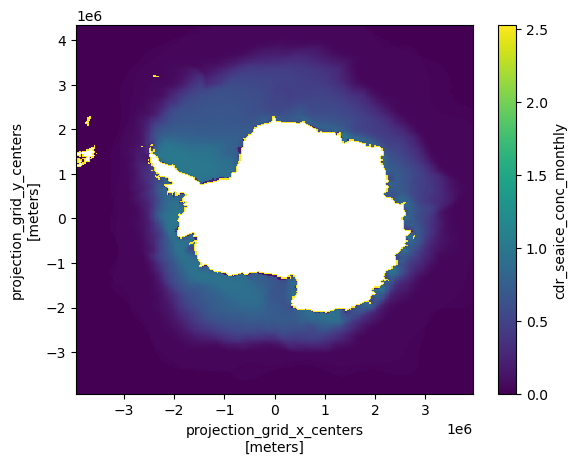

In [26]:
ds['cdr_seaice_conc_monthly'].isel(time = slice(14, 135)).mean('time').plot()

#### Extra reading for the curious

Something cool about `xarray` is that it works "lazily". This means that it will not actually go and calculate anything until you tell it to do it explicitely (using `.load()` or `.compute()`). When you do this, the data is actually loaded into the computer's memory.

Think of it this way: it is a waiter that comes to your table and takes down your order, but won't cook anything until you tell them your done and please go to the kitchen and do your order. 

What is the benefit of this? The original dataset might be too big initially, but by performing certain operations to achieve your end result, you are having a smaller, more manageable dataset. 

*Plotting requires loading. So even if you haven't explicitely loaded your data, the moment you plot it `xarray` will try to load it all into memory*.

## MatPlotlib

`matplotlib` is *the* library for plotting. It has functions to do many many many different plots. We will usually only load a part of the library called `pyplot`, the following way:

    import matplotlib.pyplot as plt

In [27]:
import matplotlib.pyplot as plt

In [37]:
# Create a random matrix to plot
x = np.random.random([10,15])

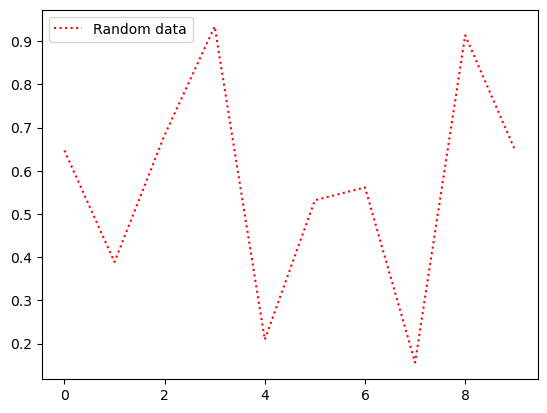

In [43]:
# Line plot with colors and linestyles and labels
plt.plot(x[:, 0], color = 'r', linestyle = ':', label = 'Random data')
# Print the legend
plt.legend();

We can also create a figure instance and add different axis (panels) to it:

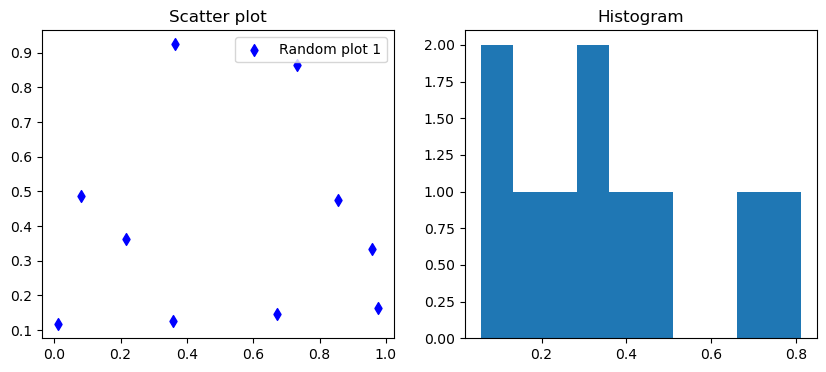

In [48]:
# Create figure and axis (1 row, 2 columns) and set the figure size (witdth, height)
fig, axs = plt.subplots(1, 2, figsize = (10, 4))
# Plot something on the first axis
axs[0].scatter(x[:, 1], x[:, 2], color = 'b', marker = 'd', label = 'Random plot 1')
axs[0].legend()
# Plot something on the second axis
axs[1].hist(x[:,4])
# Add titles
axs[0].set_title('Scatter plot')
axs[1].set_title('Histogram');

And below you can see different types of plots for 2D arrays:

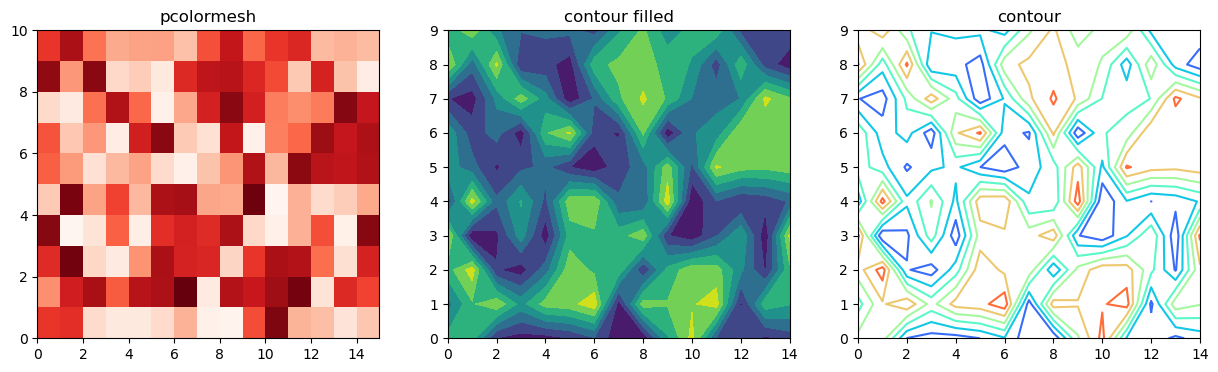

In [50]:
# Create figure and axis (1 row, 3 columns) and set the figure size (witdth, height)
fig, axs = plt.subplots(1, 3, figsize = (15, 4))
# Plot something on the first axis
axs[0].pcolormesh(x, cmap = 'Reds')
# Plot something on the second axis
axs[1].contourf(x, cmap = 'viridis')
# Plot something on the third axis
axs[2].contour(x, cmap = 'rainbow')
# Add titles
axs[0].set_title('pcolormesh')
axs[1].set_title('contour filled')
axs[2].set_title('contour');

## Cartopy

`cartopy` is a great library for making maps in different cartographic projections. A lot of our data will come with latitude, longitude information, which is *not* the same as distance. Cartopy handles all of this to allow you to make maps that preserve distance, or area, etc. It also allows to add land, draw coastlines, rivers, etc.

Let's try a couple of different maps. But first we need to import `cartopy`! We will not import all the library, just some submodules that do what we are after.

In [52]:
import cartopy.crs as ccrs
import cartopy.feature as cft

The procedure to create a map is slightly more involved than plotting with `matplotlib`. But usually you will just create the maps you need once, and then copy paste them when you need them.

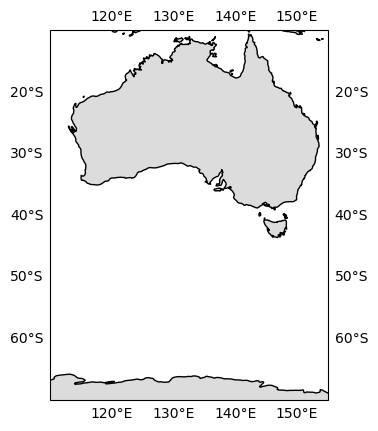

In [53]:
# Create a figure
fig = plt.figure()
# Add a subplot with the projection you are after
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
# Set the limits of the map [longitude_west, longitude_east, latitude_south, latitude_north]
ax.set_extent([110, 155, -70, -10], crs = ccrs.PlateCarree())
# Draw the land in grey with edges in black at 50m resolution
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
# Add gridlines with latitude, longitude ticks
gl = ax.gridlines(draw_labels = True, linewidth = 0)
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()

Let's try a couple of different projections:

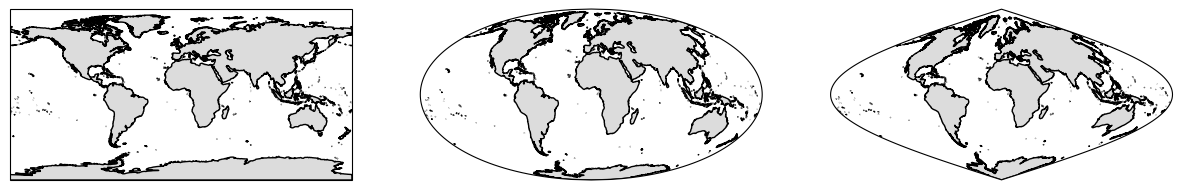

In [58]:
# Create a figure
fig = plt.figure(figsize = (15, 4))
# Add a subplot with the projection you are after
axs = [fig.add_subplot(131, projection = ccrs.PlateCarree(central_longitude = 0)),
       fig.add_subplot(132, projection = ccrs.Mollweide(central_longitude = 0)),
       fig.add_subplot(133, projection = ccrs.Sinusoidal(central_longitude = 0))]

# Iterate through axis to set properties and draw land:
for ax in axs:
    # Draw the land in grey with edges in black at 50m resolution
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='gainsboro'))